In [2]:
# Libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from matplotlib import colors as mcolors

# Plot parameters
plt.rcParams.update({
    'lines.linewidth': 2,          # linewidth
    'text.usetex': True,           # LaTeX font
    'font.family': 'sans serif',   # Serif family
    'font.size': 20,               # font size
    'axes.titlesize': 24,          # title size
    'axes.grid': True,             # grid
    'grid.linestyle': "-.",        # grid style
})

In [3]:
# idx = [0, 15, 30, 45, 60, 75, 90]

# for i in range(len(idx)):
#     fh = open(f"./archivos/eraser_225-0-90-{idx[i]}.csv", 'r',encoding='iso-8859-1')
#     tfh = open(f'./tmp/erasure_measurements/eraser_225-0-90-{idx[i]}.csv','w')

#     for line in fh:
#         line1 = line.replace(',', '.').replace(';', ',')
#         tfh.write(line1)

#     fh.close()
#     tfh.close()

The first part of the last section of the experiment consisted in the analysis of the four initial interferograms:

• same polarization;

• trivial distinguishability;

• distinguishability;

• erasure.

We start with the interferogram for which we used the same polarization in both arms.

In [3]:
path_files = './tmp/erasure_measurements'
idx = [0, 15, 30, 45, 60, 75, 90]
data = [pd.read_csv(os.path.join(path_files, f'eraser_225-0-90-{i}.csv')).reset_index() for i in idx]

# Curve to fit
def test_sin(x, amplitude, period, phase, offset):
    return amplitude * np.sin(period * x + phase) + offset

In [5]:
# fh = open(f"./archivos/eraser_225-0-90.csv", 'r', encoding = 'iso-8859-1')
# tfh = open(f'./tmp/erasure_measurements/eraser_225-0-90.csv','w')

# for line in fh:
#     line1 = line.replace(',', '.').replace(';', ',')
#     tfh.write(line1)

# fh.close()
# tfh.close()

In [4]:
# Data for the same polarization (sp)
data_sp = pd.read_csv('./tmp/erasure_measurements/eraser_0-90-90.csv')

# === Variables ===
stage_position_sp = data_sp['stage_position'].values                  # stage position (um)
coincidence_bt_sp = data_sp['coincidence_rate_t_b'].values            # coincidence rate B & T
error_coincidence_sp = np.sqrt(coincidence_bt_sp * 10) / 10           # Standard deviation
minmax_sp = [ np.min(coincidence_bt_sp), np.max(coincidence_bt_sp) ]  # Maxima of the data frame
exp_visibility_sp = np.diff(minmax_sp) / sum(minmax_sp)               # Experimental visibility

Fit of the first interferogram (same polarization).

In [5]:
# Initial guesses (test amplitude, test period, test phase, test offset)
initial_guess = [(np.max(coincidence_bt_sp) - np.min(coincidence_bt_sp)) / 2,
                    2 * np.pi / 0.404,
                    0,
                    np.mean(coincidence_bt_sp)]

# === Curve fitting ===
params_sp, pcov_sp = curve_fit(test_sin, stage_position_sp, coincidence_bt_sp , p0 = initial_guess)

# Curve fitted
position_fit_sp = np.linspace(min(stage_position_sp), max(stage_position_sp), 500)
sin_fit_sp = test_sin(position_fit_sp, *params_sp)

# Statistical parameters of the fit
perr_sp = np.sqrt(np.diag(pcov_sp))
sd_amplitude_sp, sd_period_sp, sd_phase_sp, sd_offset_sp = perr_sp

# Visibility
minmax_sp = [ np.min(sin_fit_sp), np.max(sin_fit_sp) ]
visibility_sp = np.diff(minmax_sp) / sum(minmax_sp)

# Sd. deviation of the visibility
sd_visibility_sp = visibility_sp * np.sqrt(sd_amplitude_sp ** 2 / params_sp[0] ** 2
                 + sd_offset_sp ** 2 / params_sp[3] ** 2)

Fit visibility: 0.83 ± 0.01
Experimental visibility: 0.83


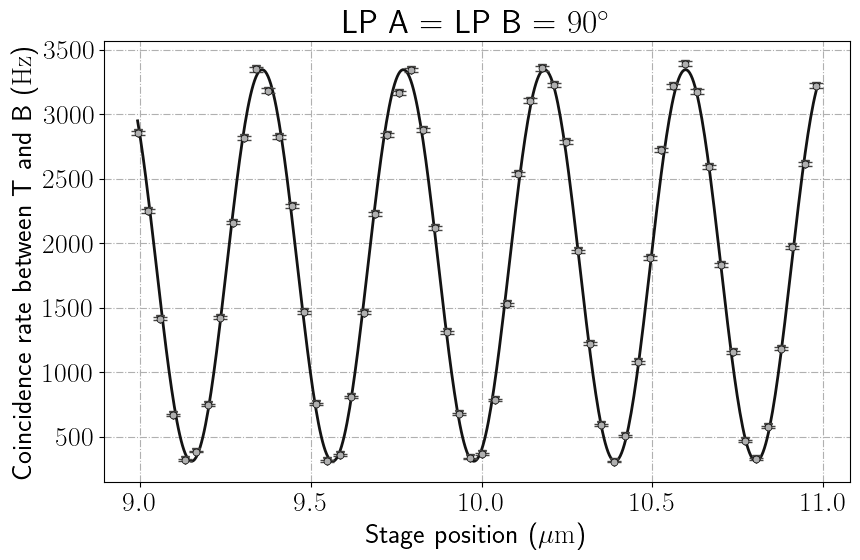

In [6]:
# Figure size
plt.figure(figsize = (9, 6))

# Figure title and legends
plt.title(r"\textsf{LP A = LP B = $90^{\circ}$}")
plt.xlabel(r"\textsf{Stage position ($\mathrm{\mu m}$)}")
plt.ylabel(r"\textsf{Coincidence rate between T and B ($\mathrm{Hz}$)}")

# Plot of the stage position against the coincidence rate for the same polarization
plt.scatter(stage_position_sp, coincidence_bt_sp, facecolor = '#B0B0B0',
            edgecolor = '#000000', linewidth = 0.5, s = 25, zorder = 4)
plt.plot(position_fit_sp, sin_fit_sp, color = '#131313')

# Plot of the error bars
plt.errorbar(stage_position_sp, coincidence_bt_sp, 
             yerr = error_coincidence_sp, fmt = 'v', capsize = 5, color = '#464543')

# Final figure parameters
plt.tight_layout()
plt.savefig('./figures/coincidence_rate_same_polarization.pdf')

# Print values
print(f"Fit visibility: {visibility_sp[0]:.2f} ± {sd_visibility_sp[0]:.2f}")
print(f"Experimental visibility: {exp_visibility_sp[0]:.2f}")

Second interferogram (trivial distinguishability)

In [9]:
# Data for the same polarization (sp)
data_dis = pd.read_csv('./tmp/erasure_measurements/eraser_0-0-90.csv')

# === Variables ===
stage_position_dis = data_dis['stage_position'].values                   # stage position (um)
coincidence_bt_dis = data_dis['coincidence_rate_t_b'].values             # coincidence rate B & T
error_coincidence_dis = np.sqrt(coincidence_bt_dis * 10) / 10            # Standard deviation
minmax_dis = [ np.min(coincidence_bt_dis), np.max(coincidence_bt_dis) ]  # Maxima of the data frame
exp_visibility_dis = np.diff(minmax_dis) / sum(minmax_dis)               # Experimental visibility

In [10]:
# Initial guesses (test amplitude, test period, test phase, test offset)
initial_guess_dis = [(np.max(coincidence_bt_dis) - np.min(coincidence_bt_dis)) / 2,
                    2 * np.pi / 0.404,
                    0,
                    np.mean(coincidence_bt_dis)]

# === Curve fitting ===
params_dis, pcov_dis = curve_fit(test_sin, stage_position_dis, coincidence_bt_dis , p0 = initial_guess_dis)

# Curve fitted
position_fit_dis = np.linspace(min(stage_position_dis), max(stage_position_dis), 500)
sin_fit_dis = test_sin(position_fit_dis, *params_dis)

# Statistical parameters of the fit
perr_dis = np.sqrt(np.diag(pcov_dis))
sd_amplitude_dis, sd_period_dis, sd_phase_dis, sd_offset_dis = perr_dis

# Visibility
minmax_dis = [ np.min(sin_fit_dis), np.max(sin_fit_dis) ]
visibility_dis = np.diff(minmax_dis) / sum(minmax_dis)

# Sd. deviation of the visibility
sd_visibility_dis = visibility_dis * np.sqrt(sd_amplitude_dis ** 2 / params_dis[0] ** 2
                 + sd_offset_dis ** 2 / params_dis[3] ** 2)

Fit visibility: 0.01 ± 0.01
Experimental visibility: 0.07


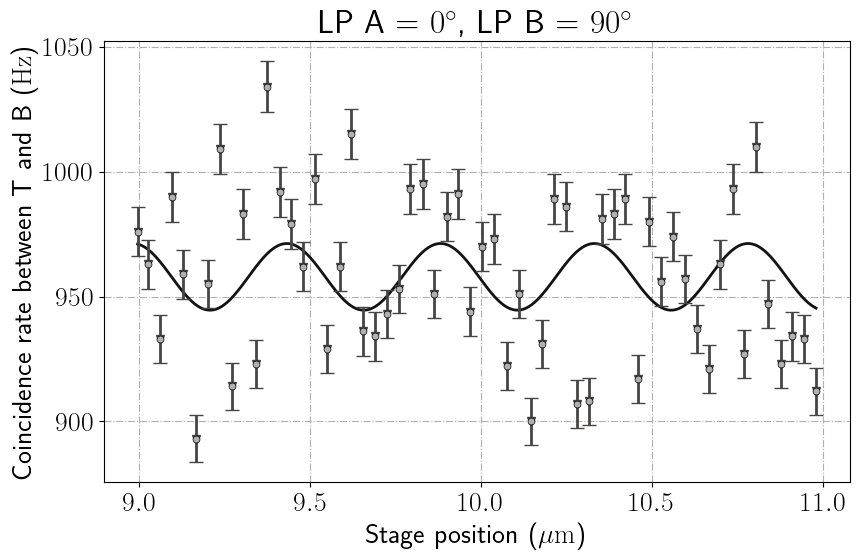

In [11]:
# Figure size
plt.figure(figsize = (9, 6))

# Figure title and legends
plt.title(r"\textsf{LP A = $0^{\circ}$, LP B = $90^{\circ}$}")
plt.xlabel(r"\textsf{Stage position ($\mathrm{\mu m}$)}")
plt.ylabel(r"\textsf{Coincidence rate between T and B ($\mathrm{Hz}$)}")

# Plot of the stage position against the coincidence rate for the same polarization
plt.scatter(stage_position_dis, coincidence_bt_dis, facecolor = '#B0B0B0',
            edgecolor = '#000000', linewidth = 0.5, s = 25, zorder = 4)
plt.plot(position_fit_dis, sin_fit_dis, color = '#131313')

# Plot of the error bars
plt.errorbar(stage_position_dis, coincidence_bt_dis, 
             yerr = error_coincidence_dis, fmt = 'v', capsize = 5, color = '#464543')

# Final figure parameters
plt.tight_layout()
plt.savefig('./figures/coincidence_rate_same_lpa0.pdf')

# Print values
print(f"Fit visibility: {visibility_dis[0]:.2f} ± {sd_visibility_dis[0]:.2f}")
print(f"Experimental visibility: {exp_visibility_dis[0]:.2f}")

Third interferogram (partial distinguishability).

In [13]:
# Data for the same polarization (sp)
data_pdis = pd.read_csv('./tmp/erasure_measurements/eraser_225-0-90.csv')

# === Variables ===
stage_position_pdis = data_pdis['stage_position'].values                    # stage position (um)
coincidence_bt_pdis = data_pdis['coincidence_rate_t_b'].values              # coincidence rate B & T
error_coincidence_pdis = np.sqrt(coincidence_bt_pdis * 10) / 10             # Standard deviation
minmax_pdis = [ np.min(coincidence_bt_pdis), np.max(coincidence_bt_pdis) ]  # Maxima of the data frame
exp_visibility_pdis = np.diff(minmax_pdis) / sum(minmax_pdis)               # Experimental visibility

In [14]:
# Initial guesses (test amplitude, test period, test phase, test offset)
initial_guess_pdis = [(np.max(coincidence_bt_pdis) - np.min(coincidence_bt_pdis)) / 2,
                    2 * np.pi / 0.404,
                    0,
                    np.mean(coincidence_bt_pdis)]

# === Curve fitting ===
params_pdis, pcov_pdis = curve_fit(test_sin, stage_position_pdis, coincidence_bt_pdis , p0 = initial_guess_pdis)

# Curve fitted
position_fit_pdis = np.linspace(min(stage_position_pdis), max(stage_position_pdis), 500)
sin_fit_pdis = test_sin(position_fit_pdis, *params_pdis)

# Statistical parameters of the fit
perr_pdis = np.sqrt(np.diag(pcov_pdis))
sd_amplitude_pdis, sd_period_pdis, sd_phase_pdis, sd_offset_pdis = perr_pdis

# Visibility
minmax_pdis = [ np.min(sin_fit_pdis), np.max(sin_fit_pdis) ]
visibility_pdis = np.diff(minmax_pdis) / sum(minmax_pdis)

# Sd. deviation of the visibility
sd_visibility_pdis = visibility_pdis * np.sqrt(sd_amplitude_pdis ** 2 / params_pdis[0] ** 2
                 + sd_offset_pdis ** 2 / params_pdis[3] ** 2)

Fit visibility: 0.02 ± 0.01
Experimental visibility: 0.07


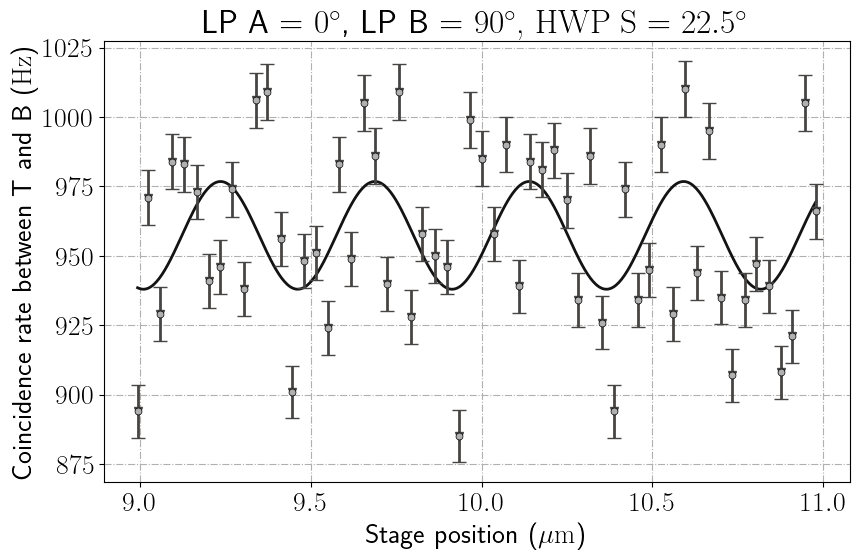

In [15]:
# Figure size
plt.figure(figsize = (9, 6))

# Figure title and legends
plt.title(r"\textsf{LP A = $0^{\circ}$, LP B = $90^{\circ}$}, HWP S = $22.5^{\circ}$")
plt.xlabel(r"\textsf{Stage position ($\mathrm{\mu m}$)}")
plt.ylabel(r"\textsf{Coincidence rate between T and B ($\mathrm{Hz}$)}")

# Plot of the stage position against the coincidence rate for the same polarization
plt.scatter(stage_position_pdis, coincidence_bt_pdis, facecolor = '#B0B0B0',
            edgecolor = '#000000', linewidth = 0.5, s = 25, zorder = 4)
plt.plot(position_fit_pdis, sin_fit_pdis, color = '#131313')

# Plot of the error bars
plt.errorbar(stage_position_pdis, coincidence_bt_pdis, 
             yerr = error_coincidence_pdis, fmt = 'v', capsize = 5, color = '#464543')

# Final figure parameters
plt.tight_layout()
plt.savefig('./figures/coincidence_rate_beta.pdf')

# Print values
print(f"Fit visibility: {visibility_pdis[0]:.2f} ± {sd_visibility_pdis[0]:.2f}")
print(f"Experimental visibility: {exp_visibility_pdis[0]:.2f}")

Four interferogram (erasure).

In [16]:
# Data for the same polarization (sp)
data_er = pd.read_csv('./tmp/erasure_measurements/eraser_225-0-90-45.csv')

# === Variables ===
stage_position_er = data_er['stage_position'].values                  # stage position (um)
coincidence_bt_er = data_er['coincidence_rate_t_b'].values            # coincidence rate B & T
error_coincidence_er = np.sqrt(coincidence_bt_er * 10) / 10           # Standard deviation
minmax_er = [ np.min(coincidence_bt_er), np.max(coincidence_bt_er) ]  # Maxima of the data frame
exp_visibility_er = np.diff(minmax_er) / sum(minmax_er)               # Experimental visibility

In [17]:
# Initial guesses (test amplitude, test period, test phase, test offset)
initial_guess_er = [(np.max(coincidence_bt_er) - np.min(coincidence_bt_er)) / 2,
                    2 * np.pi / 0.404,
                    0,
                    np.mean(coincidence_bt_er)]

# === Curve fitting ===
params_er, pcov_er = curve_fit(test_sin, stage_position_er, coincidence_bt_er, p0 = initial_guess_er)

# Curve fitted
position_fit_er = np.linspace(min(stage_position_er), max(stage_position_er), 500)
sin_fit_er = test_sin(position_fit_er, *params_er)

# Statistical parameters of the fit
perr_er = np.sqrt(np.diag(pcov_er))
sd_amplitude_er, sd_period_er, sd_phase_er, sd_offset_er = perr_er

# Visibility
minmax_er = [ np.min(sin_fit_er), np.max(sin_fit_er) ]
visibility_er = np.diff(minmax_er) / sum(minmax_er)

# Sd. deviation of the visibility
sd_visibility_er = visibility_er * np.sqrt(sd_amplitude_er ** 2 / params_er[0] ** 2
                 + sd_offset_er ** 2 / params_er[3] ** 2)

Fit visibility: 0.13 ± 0.01
Experimental visibility: 0.17


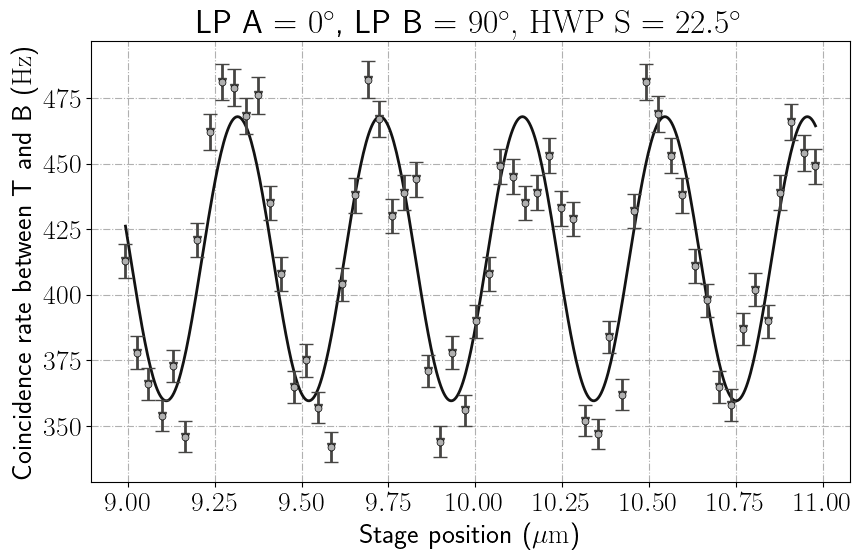

In [18]:
# Figure size
plt.figure(figsize = (9, 6))

# Figure title and legends
plt.title(r"\textsf{LP A = $0^{\circ}$, LP B = $90^{\circ}$}, HWP S = $22.5^{\circ}$")
plt.xlabel(r"\textsf{Stage position ($\mathrm{\mu m}$)}")
plt.ylabel(r"\textsf{Coincidence rate between T and B ($\mathrm{Hz}$)}")

# Plot of the stage position against the coincidence rate for the same polarization
plt.scatter(stage_position_er, coincidence_bt_er, facecolor = '#B0B0B0',
            edgecolor = '#000000', linewidth = 0.5, s = 25, zorder = 4)
plt.plot(position_fit_er, sin_fit_er, color = '#131313')

# Plot of the error bars
plt.errorbar(stage_position_er, coincidence_bt_er, 
             yerr = error_coincidence_er, fmt = 'v', capsize = 5, color = '#464543')

# Final figure parameters
plt.tight_layout()
plt.savefig('./figures/coincidence_rate_alphabeta.pdf')

# Print values
print(f"Fit visibility: {visibility_er[0]:.2f} ± {sd_visibility_er[0]:.2f}")
print(f"Experimental visibility: {exp_visibility_er[0]:.2f}")

Finally, I analyzed the visibility, distinguishability, and $M$ parameter against the angle of the Linear Polarizer C. First, I opened all the files.

In [19]:
# Index
idx_er = [0, 15, 30, 45, 60, 75, 90]

# Files
path_files = './tmp/erasure_measurements'
data = [pd.read_csv(os.path.join(path_files, f'eraser_225-0-90-{i}.csv')).reset_index() for i in idx_er]

In [21]:
# Initialized the empty list where I stored the visibilities
visibilities = []
exp_visibilities = []
sd_visibilities = []

for cdata in data:
    # Variables
    stage_position = cdata['stage_position'].values
    coincidence_bt = cdata['coincidence_rate_t_b'].values
    minmax_0 = [np.min(coincidence_bt), np.max(coincidence_bt)]

    # Experimental visibility
    exp_visibility = np.diff(minmax_0) / sum(minmax_0)

    # Initial guesses (test amplitude, test period, test phase, test offset)
    initial_guess = [(np.max(coincidence_bt) - np.min(coincidence_bt)) / 2,
                        2 * np.pi / 0.404,
                        0,
                        np.mean(coincidence_bt)]

    # === Curve fitting ===
    params, pcov = curve_fit(test_sin, stage_position, coincidence_bt , p0 = initial_guess)

    # Fit
    position_fit = np.linspace(min(stage_position), max(stage_position), 500)
    sin_fit = test_sin(position_fit, *params)

    # Statistical parameters of the fit
    perr = np.sqrt(np.diag(pcov))
    sd_amplitude, sd_period, sd_phase, sd_offset = perr

    # Visibility
    minmax = [np.min(sin_fit), np.max(sin_fit)]
    visibility = np.diff(minmax) / sum(minmax)

    # Sd. deviation of the visibility
    sd_visibility = visibility * np.sqrt(
            sd_amplitude ** 2 / params[0] ** 2 + sd_offset ** 2 / params[3] ** 2)

    # Appending the results
    visibilities.append(visibility[0])
    exp_visibilities.append(exp_visibility[0])
    sd_visibilities.append(sd_visibility[0])

# Best visibility
max_visibility = np.max(visibilities)
max_visibility_index = np.argmax(visibilities)

# Print the value of the best visibility
print(f"Best visibility = {max_visibility:.2f} ± {sd_visibilities[max_visibility_index]:.2f}")

Best visibility = 0.14 ± 0.01


In [24]:
# === Distinguishability ===
data_quantum_eraser = pd.read_csv('./tmp/erasure_measurements/quantum_eraser_coincidences_arms.csv')

# Coincidences in arms A and B
coincidence_arm_a = data_quantum_eraser['arm_A_coincidence_rate'].values
coincidence_arm_b = data_quantum_eraser['arm_B_coincidence_rate'].values

# Turning the lists into arrays
coincidence_arm_a = np.array(coincidence_arm_a)
coincidence_arm_b = np.array(coincidence_arm_b)

# Initialized the empty list where I stored the distinguishability and m parameter values
distinguishability = [] # distinguishability
m_values = [] # m_values

# Distinguishability
for i in range(len(coincidence_arm_a)):
    max_values = 2 * np.maximum(coincidence_arm_a[i], coincidence_arm_b[i])
    sum_values = coincidence_arm_a[i] + coincidence_arm_b[i]
    
    # Distinguishability
    D = max_values / sum_values - 1
    distinguishability.append(D)

# M-values
for i in range(len(coincidence_arm_a)):
    M = np.sqrt(distinguishability[i] ** 2 + visibilities[i] ** 2)

    m_values.append(M)

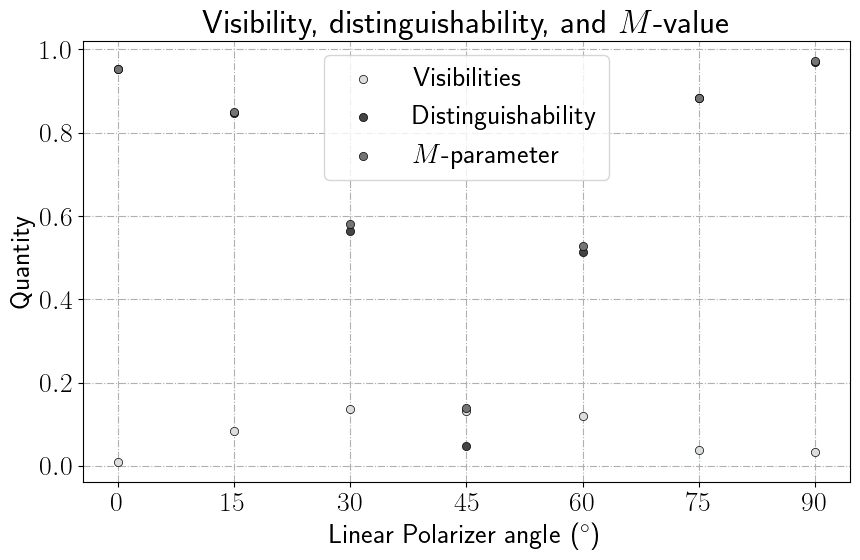

In [27]:
# Angle position
lp_c_angle = [0, 15, 30, 45, 60, 75, 90]

# Figure size
plt.figure(figsize = (9, 6))

# Figure title and legends
plt.title(r'\textsf{Visibility, distinguishability, and $M$-value}')
plt.xlabel(r'\textsf{Linear Polarizer angle (${}^{\circ}$)}')
plt.ylabel(r'\textsf{Quantity}')

# Visibility plot
plt.scatter(lp_c_angle, visibilities, facecolor = '#dadedf', 
            edgecolor = '#000000', linewidth = 0.5, s = 35, label = r'\textsf{Visibilities}', zorder = 4)
# Distinguishability plot
plt.scatter(lp_c_angle, distinguishability, facecolor = '#464543', 
            edgecolor = '#000000', linewidth = 0.5, s = 35, label = r'\textsf{Distinguishability}', zorder = 5)
# M parameter plot
plt.scatter(lp_c_angle, m_values, facecolor = '#747474', 
            edgecolor = '#000000', linewidth = 0.5, s = 35, label = r'\textsf{$M$-parameter}', zorder = 6)

# Final figure parameters
plt.xticks(np.arange(0, 91, 15))
plt.legend()
plt.tight_layout()
plt.savefig('./figures/vdm.pdf')